In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

NanumGothic


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/DATA/new_data_1.csv',encoding ='UTF-8')
df = pd.DataFrame(data)
df1 = df.iloc[:,2:-2]
df1

,bus_stop_num,bus_all,old_all
0,7,978191,1904
1,9,200096,493
2,7,98540,54
3,10,71832,35
4,25,349997,250
...,...,...,...
172,0,0,0
173,0,0,0
174,8,1510,1
175,11,4522,1


KeyError: ignored

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


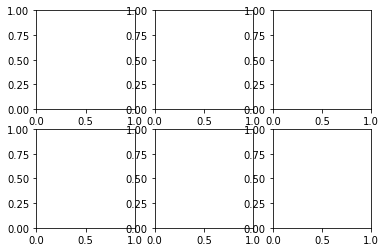

In [ ]:
#Boxplot을 통해 이상치 및 값 확인.
x= df1[['bus_stop_num', 'bus_all', 'bus_all', 'old_all', 'taxi_all', 'ratio']]
names = list(df1.columns)
fig, axes = plt.subplots(round(len(names)/3), 3) 
y = 0;
for name in names:
    i, j = divmod(y, 3) 
    sns.boxplot(x=x[name], ax=axes[i, j])
    y = y + 1
plt.tight_layout()
plt.show()

In [ ]:
#Hierarchycal clustering feature 추출 
features = ['택스_승차합', '택시_하차합', 'BUS_정류장_개수', 'BUS_탑승', 'BUS_하차', 'BUS_환승','고령인구 발생량', '고령인구 도착량']
x = df.loc[:, features].values
x

array([[ 10407,   8604,      7, ..., 239119,    886,   1018],
       [ 16079,  14672,      9, ...,  22056,    391,    102],
       [  6181,   6680,      7, ...,   5595,     50,      4],
       ...,
       [    24,    138,      8, ...,      3,      1,      0],
       [    45,    225,     11, ...,      5,      1,      0],
       [ 18845,  23155,     24, ...,  29536,    127,      9]])

In [ ]:
#전처리 및 PCA 진행
from sklearn.preprocessing import StandardScaler
x_1 = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_1)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf

,principal component 1,principal component 2
0,1.653564,-0.666941
1,-0.562541,-0.109367
2,-1.041438,0.070604
3,-0.928348,-0.025627
4,0.446350,-0.812744
...,...,...
172,-1.556872,0.390648
173,-1.556872,0.390648
174,-1.316824,0.154488
175,-1.222354,0.063876


In [ ]:
#PCA값을 원본 데이터 SET에 넣기.
data = pd.read_csv('/content/drive/MyDrive/공빅데_대전_87조/코드 /법정동_데이터셋.csv',encoding ='UTF-8')
df3 = pd.DataFrame(data)
df4 = pd.concat([df3,principalDf],axis=1)
df4.head()

,법정동,법정동코드,택스_승차합,택시_하차합,BUS_정류장_개수,BUS_탑승,BUS_하차,BUS_환승,고령인구 발생량,고령인구 도착량,교통유동량,버스혼잡도,principal component 1,principal component 2
0,동구 원동,3011010100,10407,8604,7,534244,443947,239119,886,1018,997202,597665.00000,1.653564,-0.666941
1,동구 인동,3011010200,16079,14672,9,109486,90610,22056,391,102,230847,119553.77780,-0.562541,-0.109367
2,동구 효동,3011010300,6181,6680,7,52783,45757,5595,50,4,111401,59319.71429,-1.041438,0.070604
3,동구 천동,3011010400,9901,12841,10,39214,32618,1133,28,7,94574,42475.80000,-0.928348,-0.025627
4,동구 가오동,3011010500,32633,35952,25,181248,168749,10920,218,32,418582,187997.96000,0.446350,-0.812744


In [ ]:
#hierarchycal Agglomerative Clustering 후 군집 자동 분류
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(linkage = 'ward')
agg = hc.fit_predict(principalDf)
print(agg)

[1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


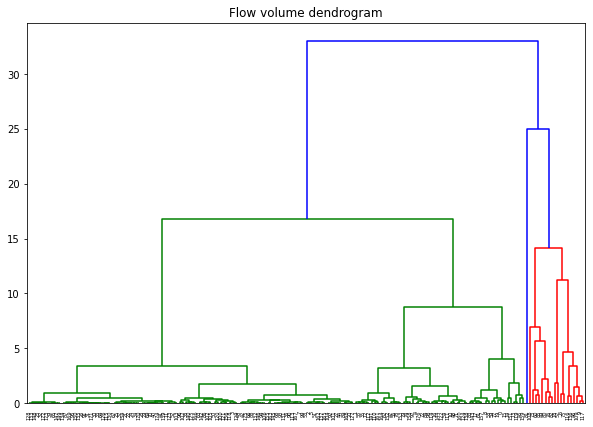

In [ ]:
#dendrogram 시각화
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Flow volume dendrogram")
dend = shc.dendrogram(shc.linkage(principalDf,method = 'ward'))

In [ ]:
# Dendrogram을 바탕으로 클러스터의 변수 설정 후, 다시 계층 분석 실시.
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean',linkage = 'ward')
cluster.fit_predict(principalDf)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [ ]:
#원본 데이터 SET에 클러스터 붙히기.
df4['cluster_id'] = cluster.fit_predict(principalDf)
df4

,법정동,법정동코드,택스_승차합,택시_하차합,BUS_정류장_개수,BUS_탑승,BUS_하차,BUS_환승,고령인구 발생량,고령인구 도착량,교통유동량,버스혼잡도,principal component 1,principal component 2,cluster_id
0,동구 원동,3011010100,10407,8604,7,534244,443947,239119,886,1018,997202,597665.000000,1.653564,-0.666941,0
1,동구 인동,3011010200,16079,14672,9,109486,90610,22056,391,102,230847,119553.777800,-0.562541,-0.109367,0
2,동구 효동,3011010300,6181,6680,7,52783,45757,5595,50,4,111401,59319.714290,-1.041438,0.070604,0
3,동구 천동,3011010400,9901,12841,10,39214,32618,1133,28,7,94574,42475.800000,-0.928348,-0.025627,0
4,동구 가오동,3011010500,32633,35952,25,181248,168749,10920,218,32,418582,187997.960000,0.446350,-0.812744,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,대덕구 부수동,3023012200,0,0,0,0,0,0,0,0,0,0.000000,-1.556872,0.390648,0
173,대덕구 황호동,3023012300,0,0,0,0,0,0,0,0,0,0.000000,-1.556872,0.390648,0
174,대덕구 삼정동,3023012400,24,138,8,898,612,3,1,0,1672,974.500000,-1.316824,0.154488,0
175,대덕구 미호동,3023012500,45,225,11,2525,1997,5,1,0,4792,2706.545455,-1.222354,0.063876,0


In [ ]:
# plt.figure(figsize = (10,10))
# plt.scatter(principalDf[:,0],principalDf[:,1], c = cluster.labels_, cmap = 'rainbow')